# Homework 11

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date:** Saturday, December 1st, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

### Collaborators
**Dylan Randle, Michael S. Emanuel, Anna Davydova, Joe Davison**

<div class="answer-separator">
------------------------
</div>

In [1]:
import pymc3 as pm

['dot', '-Tps', '/var/folders/39/46zhk40n541d84slzlnnt3600000gn/T/tmpkn5zcgtl'] return code: 1

stdout, stderr:
 b''
b'Format: "ps" not recognized. Use one of:\n'



In [2]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm

import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
#additional imports
import pandas as pd
import pymc3 as pm

## Question 1: Crazy Rich Bayesians Don't Need No Educations?

**coding required**

In this problem, you will explore how to recast data, tasks and research questions from a variety of different contexts so that an existing model can be applied for analysis.

Example 10.1.3 in ["Statistical Rethinking"](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjopa0chtr7ns%2FStatistical_Rethinking_excerpt.pdf), the excerpt of which is included with this assignment, illustrates a study of the effect of an applicant's gender on graduate school admissions to six U.C. Berkeley departments through a comparison of four models. 

In this problem, you are given data from the [1994 U.S. Census](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjop9zvsjoscq%2Fcensus_data.csv). The data has been processed so that only a subset of the features are present (for full dataset as well as the description see the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Census+Income)). You will be investigate the effect of gender on a person's yearly income in the dataset. In particular, we want to know how a person's gender effect the likelihood of their yearly salary being above or below \$50k. 

1.1. Read the dataset into a dataframe and aggregate the dataset by organizing the  dataframe into seven different categories. 

The categories we wish to consider are: 
* 4 year college degree
* Some-college or two year academic college degree
* High school
* Professional, vocational school
* Masters 
* Doctorate
* Some or no high school

Note that you might have to combine some of the existing education categories in your dataframe. For each category, we suggest that you only keep track of a count of the number of males and females who make above (and resp. below) the crazy rich income of $50k (see the dataset in Example 10.1.3). 

1.2. Following Example 10.1.3, build two models for the classification of an individual's yearly income (1 being above \$50k and 0 being below), one of these models should include the effect of gender while the other should not. 

1.3. Replicate the analysis in 10.1.3 using your models; specifically, compute wAIC scores and make a plot like Figure 10.5 (posterior check) to see how well your models fits the data. 

1.4. Following Example 10.1.3, build two models for the classification of an individual's yearly income taking into account education. One of the models should take into account education only the other should take into account gender and education on income.

1.5. Replicate the analysis in 10.1.3 using your models; specifically, compute wAIC scores and make a plot like Figure 10.6 (posterior check) to see how well your model fits the data.

1.6. Using your analysis from 1.3, discuss the effect gender has on income.

1.7. Using your analysis from 1.5, discuss the effect of gender on income taking into account an individual's education.

(**Hint: If you haven't seen WAIC, it's because we'll be covering it on Monday November 26, 2018.  In the meantime checkout info about WAIC in this resource on [PyMC3 model selection](https://docs.pymc.io/notebooks/model_comparison.html).**)

**Gratuitous Titular Reference**:  

If you haven't watched [Crazy Rich Asians](http://www.crazyrichasiansmovie.com/) then it might be time.

If you haven't listened to [Pink Floyd's](https://en.wikipedia.org/wiki/Pink_Floyd) [The Wall](https://en.wikipedia.org/wiki/The_Wall) then it might be time.

Also who are you? :-)

Anyway [You don't need no thought control](https://www.youtube.com/watch?v=YR5ApYxkU-U), [You probably want us teaching staff to leave you kids alone](https://www.youtube.com/watch?v=YR5ApYxkU-U), and [Education is overrated, right?  You don't need it!](https://www.youtube.com/watch?v=YR5ApYxkU-U)

<div class="answer-separator">
------------------------
</div>

## Question 2:  My Sister-In-Law's Baby Cousin Tracy ...

**coding required**

Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjop9sr9dh4g5%2Fsurvey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in three ways. 


2.1. Using pymc3, create a bayesian linear regression model  with `age` as the quantitative predictor and `knowlgbtq` as the response variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

2.2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

(**Hint: For an example of GP Regression from class see [this GP Recap](http://am207.info/wiki/gpsalmon.html)**)

2.3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?


**pre-regression analysis**

In [4]:
#load the data
survey = pd.read_csv('survey.csv')

Text(0.5,1,"Responders' Age vs. % with at least one LGBTQ Acquaitance")

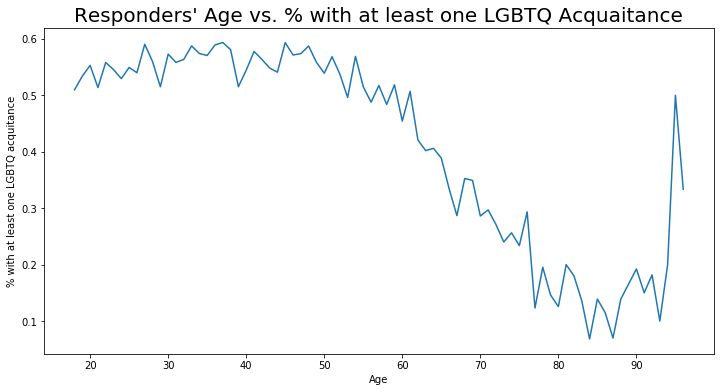

In [5]:
#quick look at our data
survey.head()
plt.figure(figsize=(12,6))
plt.plot(survey.age, survey.knowlgbtq/survey.numr)
plt.xlabel('Age')
plt.ylabel("% with at least one LGBTQ acquitance")
plt.title("Responders' Age vs. % with at least one LGBTQ Acquaitance", fontsize=20)

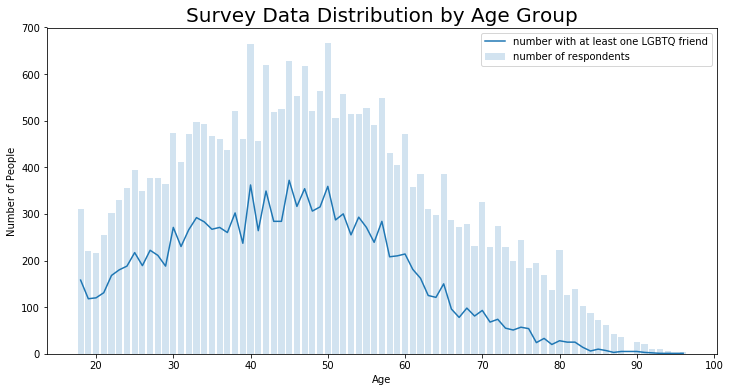

In [6]:
survey.head()
plt.figure(figsize=(12,6))
plt.bar(survey.age,survey.numr, alpha=0.2, label='number of respondents')
plt.plot(survey.age, survey.knowlgbtq, label='number with at least one LGBTQ friend')
plt.title('Survey Data Distribution by Age Group', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend()

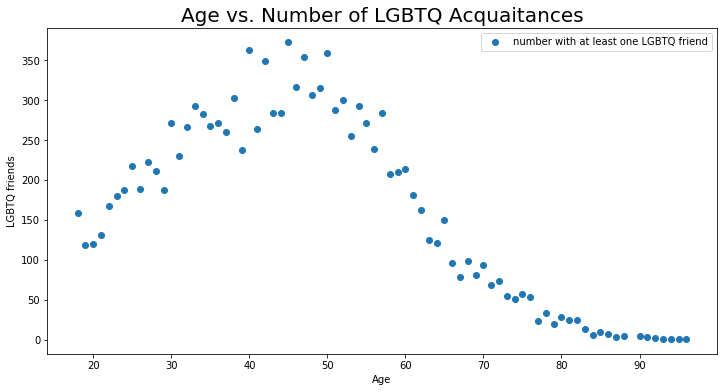

In [7]:
survey.head()
plt.figure(figsize=(12,6))
plt.scatter(survey.age, survey.knowlgbtq, label='number with at least one LGBTQ friend')
plt.title('Age vs. Number of LGBTQ Acquaitances', fontsize=20)
plt.xlabel('Age')
plt.ylabel('LGBTQ friends')
plt.legend()

Text(0,0.5,'frequency')

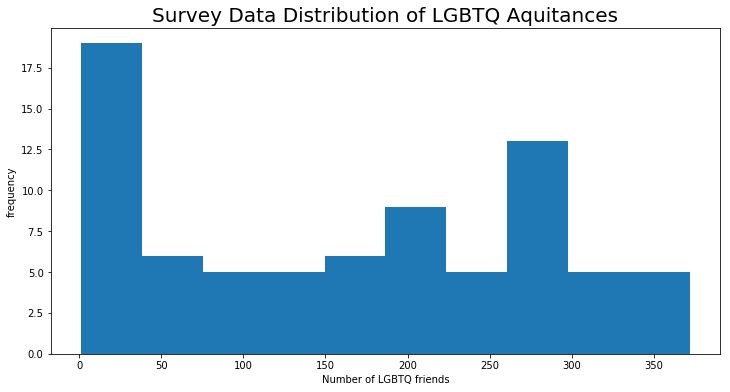

In [8]:
plt.figure(figsize=(12,6))
plt.hist( (survey.knowlgbtq), label='number with at least one LGBTQ friend')
plt.title('Survey Data Distribution of LGBTQ Aquitances', fontsize=20)
plt.xlabel('Number of LGBTQ friends')
plt.ylabel('frequency')

Overall, the data looks reasonable for the most part.  The distribution of responders by age mirrors the distribution of population >18yrs of age.  The number of respondents with at least one LGBTQ acquaitance by age also appears to follow a similar distribution. The overall distribution of # of LGBTQ acquaitances does not appear normal, however (more of a half-Cauchy). We also note that due to very few samples of the oldest population (>90), looking at % of those who have LGBTQ acquaitance can be misleading (i.e the spike in our first chart). We also note, that a regression line would not work for our data. The scatter plot of Age vs. LGBTQ acquaintances points to a polynomial relationship. So I am going to add a polynomial term or two to our Bayesian Regression model. Now that we know what we are working with we will start with Bayesian Regression. 

**2.1**

In [9]:
# a lot of this code is attributed to class AM 207 class notes
#run pymc3 on centered data

with pm.Model() as hm2c:
    intercept = pm.Normal('intercept', mu=100, sd=50)
    slope1 = pm.Normal('slope1', mu=0, sd=10)
    slope2=pm.Normal('slope2', mu=0, sd=10)
    slope3=pm.Normal('slope3', mu=0,sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    #I am going to center our data just in case
    mu = pm.Deterministic('mu', intercept + slope1 * (survey.age- survey.age.mean() )+slope2 * (survey.age- survey.age.mean() )**2+slope3 * (survey.age - survey.age.mean())**3)
    knowlgbtq = pm.Normal('knowlgbtq', mu=mu, sd=sigma, observed=survey.knowlgbtq)
    stepper=pm.Metropolis()
    #find MAP
    start=pm.find_MAP()
    tracehm2c = pm.sample(20000, stepper,start)


logp = -413.49, ||grad|| = 0.029176: 100%|██████████| 63/63 [00:00<00:00, 1118.63it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [slope3]
>Metropolis: [slope2]
>Metropolis: [slope1]
>Metropolis: [intercept]
Sampling 2 chains: 100%|██████████| 41000/41000 [00:32<00:00, 1260.26draws/s]
/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 10% for some parameters.


In [10]:
#remove burnin
trace=tracehm2c[4000::]

Text(0.5,1,'Trace Plots')

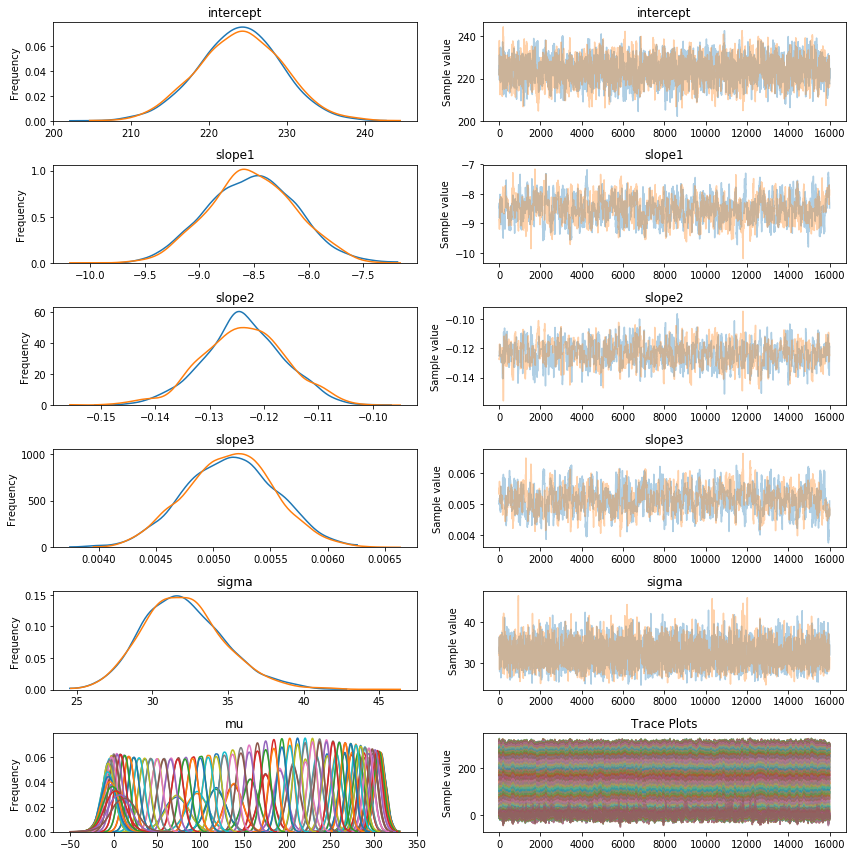

In [11]:
pm.traceplot(trace)
plt.title('Trace Plots')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f765e80>,
      dtype=object)

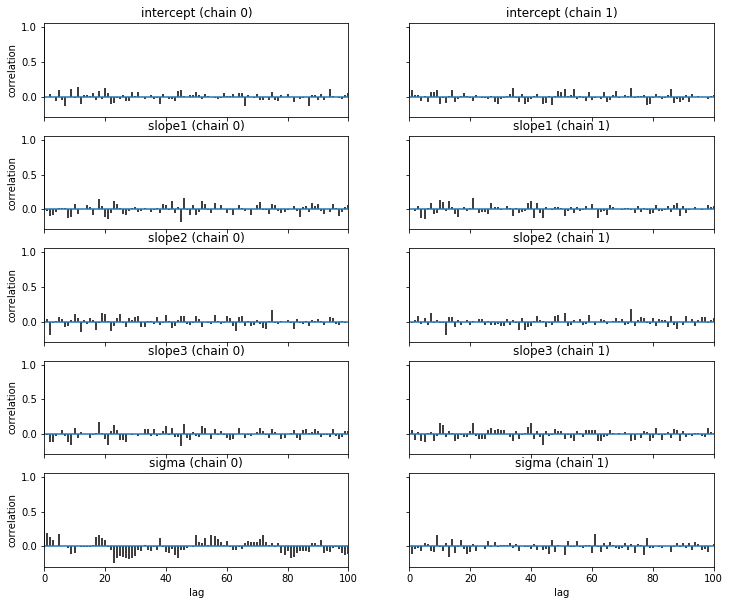

In [12]:
plt.title('autocorrelation plots')
pm.autocorrplot(trace[::100], varnames=['intercept', 'slope1','slope2','slope3', 'sigma'])

Even after significant thinning, we still see autocorrelation in our model. It is not surprising, however, since we have polynomial version of age that are highly correlated with each other. It would have been better to use orthogonal polynomials/Chebyshev's polynomials here.

Text(0.5,1,'Posterior Means vs. Survey Data Range')

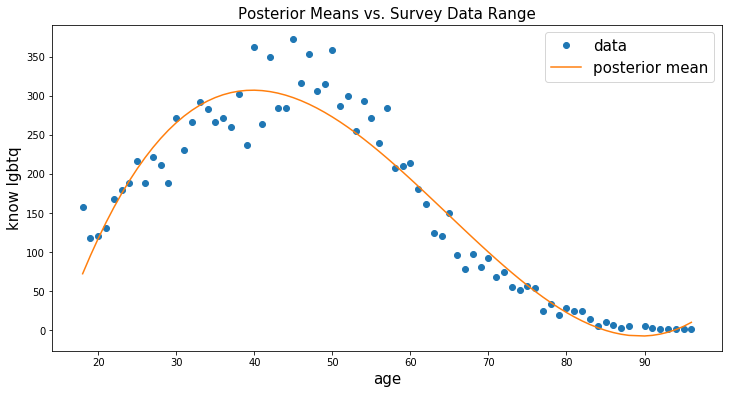

In [13]:
plt.figure(figsize=(12,6))
plt.plot(survey.age, survey.knowlgbtq, 'o', label="data")
plt.plot(survey.age, trace[::100]['mu'].mean(axis=0), label="posterior mean")
plt.xlabel("age", fontsize=15)
plt.ylabel("know lgbtq", fontsize=15)
plt.legend(fontsize=15);
plt.title('Posterior Means vs. Survey Data Range', fontsize=15)

In [14]:
#formally define thinned trace
trace=trace[::100]

In [15]:
#calculate predicted means in the [0,100] range
meanage = survey.age.mean()
agegrid = np.arange(0, 100)
mu_pred = np.zeros((len(agegrid), 2*len(trace)))
for i, a in enumerate(agegrid):
    mu_pred[i] = trace['intercept'] + trace['slope1'] * (a - survey.age.mean())+trace['slope2'] * (a- survey.age.mean())**2+trace['slope3'] * (a - survey.age.mean())**3


In [16]:
mu_mean = mu_pred.mean(axis=1)
mu_hpd = pm.hpd(mu_pred.T)


In [17]:
#posterior predictive
postpred = pm.sample_ppc(trace, 1000, hm2c)


100%|██████████| 1000/1000 [00:04<00:00, 219.69it/s]


In [18]:
postpred['knowlgbtq'].shape

(1000, 78)

Text(0.5,1,'Post pred means in HPD band and our data with error bars')

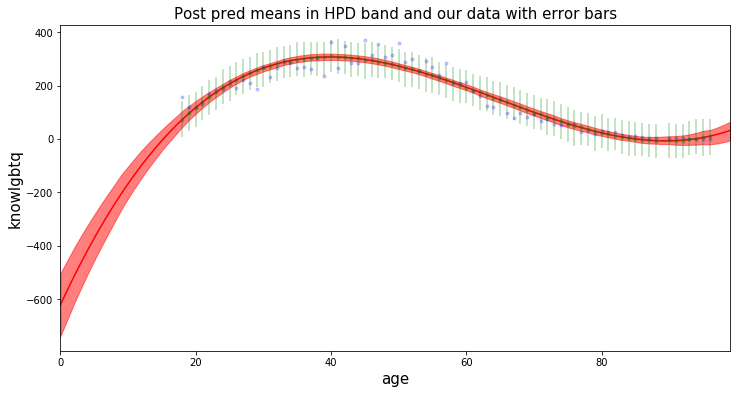

In [19]:
plt.figure(figsize=(12,6))
postpred_means = postpred['knowlgbtq'].mean(axis=0)
postpred_hpd = pm.hpd(postpred['knowlgbtq'])
plt.plot(survey.age, survey.knowlgbtq, '.', c='b', alpha=0.2)
plt.plot(agegrid, mu_mean, 'r')
plt.fill_between(agegrid, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5)
yerr=[postpred_means - postpred_hpd[:,0], postpred_hpd[:,1] - postpred_means] 
plt.errorbar(survey.age, postpred_means, yerr=yerr, fmt='--.', c='g', alpha=0.3, capthick=3)
plt.xlabel('age', fontsize=15)
plt.ylabel('knowlgbtq', fontsize=15)
plt.xlim([agegrid[0], agegrid[-1]]);
plt.title('Post pred means in HPD band and our data with error bars', fontsize=15)



In [20]:
n_ppredsamps=1000
meanage = survey.age.mean()
ppc_samples=np.zeros((len(agegrid), n_ppredsamps))

for j in range(n_ppredsamps):
    k=np.random.randint(2*len(trace))
    musamps = trace['intercept'][k] + trace['slope1'][k] * (agegrid - survey.age.mean())+trace['slope2'][k] * (agegrid- survey.age.mean())**2+trace['slope3'][k] * (agegrid - survey.age.mean())**3
    sigmasamp = trace['sigma'][k]
    ppc_samples[:,j] = np.random.normal(musamps, sigmasamp)


In [21]:
#Here my assumption is that we are looking for + - 2std interal (i.e. ~95% CI)
ppc_samples_std=[]  
i=0
while i <100:   
    std = 2*np.std((ppc_samples)[i])
    ppc_samples_std.append(std)
    i=i+1

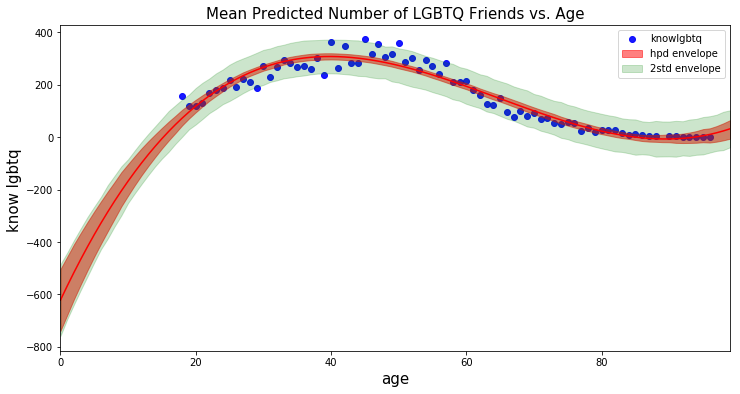

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(survey.age, survey.knowlgbtq, c='b', alpha=0.9)
plt.plot(agegrid, mu_mean, 'r')
plt.fill_between(agegrid, mu_hpd[:,0], mu_hpd[:,1], color='r', alpha=0.5, label='hpd envelope')
plt.fill_between(agegrid, mu_mean-ppc_samples_std, mu_mean+ppc_samples_std, color='green', alpha=0.2, label='2std envelope')

plt.title('Mean Predicted Number of LGBTQ Friends vs. Age', fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('know lgbtq ', fontsize=15)
plt.xlim([agegrid[0], agegrid[-1]])
plt.legend()


In [23]:
#if we were to do this analysis more simplistically just on linear feature age we would have the following
with pm.Model() as hm2c:
    intercept = pm.Normal('intercept', mu=100, sd=50)
    slope1 = pm.Normal('slope1', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    #I am going to center our data just in case
    mu = pm.Deterministic('mu', intercept + slope1 * (survey.age- survey.age.mean()) )
    knowlgbtq = pm.Normal('knowlgbtq', mu=mu, sd=sigma, observed=survey.knowlgbtq)
    stepper=pm.Metropolis()
    #find MAP
    start=pm.find_MAP()
    tracehm2c_simple = pm.sample(20000, stepper,start)


logp = -540.04, ||grad|| = 1.8217: 100%|██████████| 18/18 [00:00<00:00, 1440.08it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [slope1]
>Metropolis: [intercept]
Sampling 2 chains: 100%|██████████| 41000/41000 [00:18<00:00, 2244.51draws/s]
/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


In [24]:
trace_simple=tracehm2c_simple[4000::]

Text(0.5,1,'Traceplots for Simple Approach')

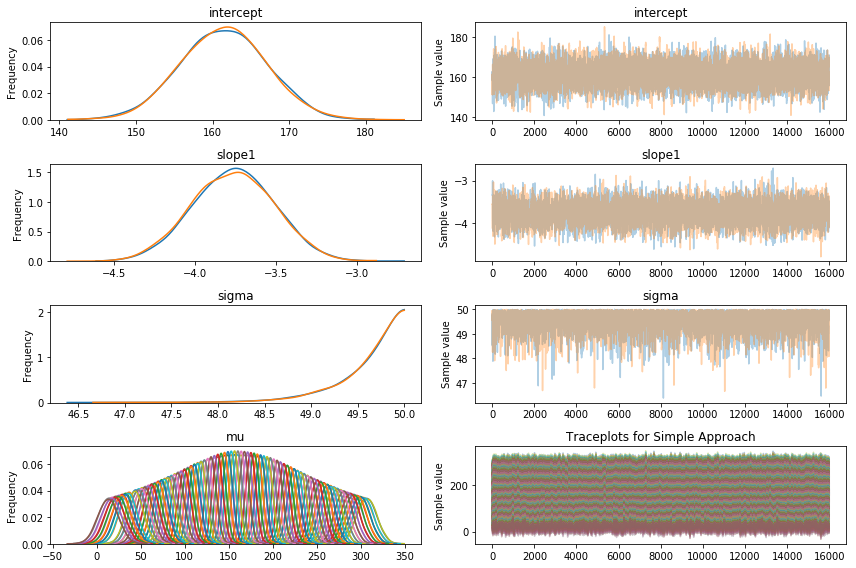

In [25]:
pm.traceplot(trace_simple)
plt.title('Traceplots for Simple Approach')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11edf8ef0>,
      dtype=object)

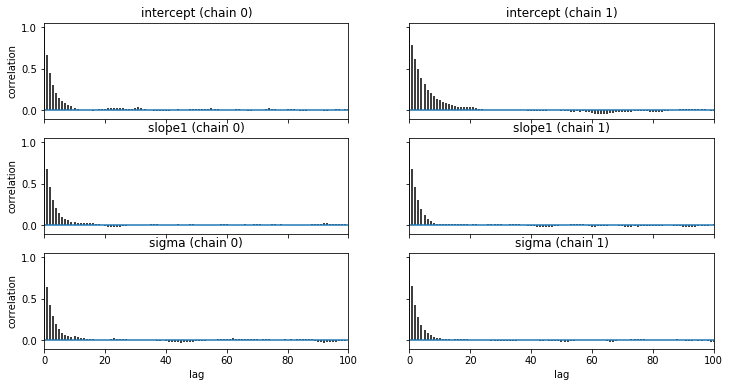

In [26]:
pm.autocorrplot(trace_simple, varnames=['intercept', 'slope1','sigma'])

Here, not surprisingly we don't see a major autocorrelation problem like we did in the polynomial regression earlier because we are just using one iteration of age variable

Text(0.5,1,'Posterior Mean vs. Actual Data (simple approach)')

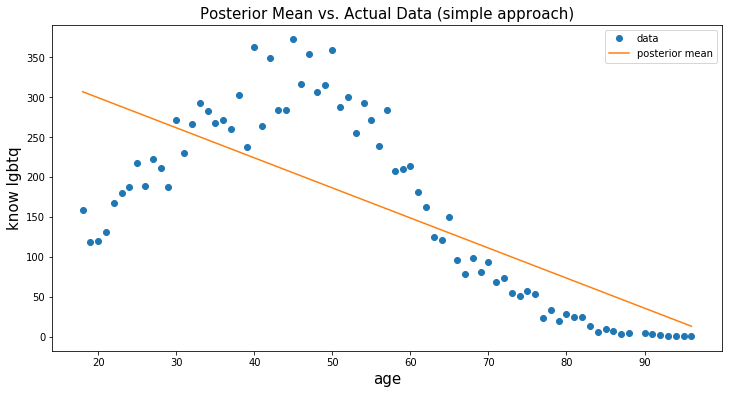

In [27]:
plt.figure(figsize=(12,6))
plt.plot(survey.age, survey.knowlgbtq, 'o', label="data")
plt.plot(survey.age, trace_simple['mu'].mean(axis=0), label="posterior mean")
plt.xlabel("age", fontsize=15)
plt.ylabel("know lgbtq", fontsize=15)
plt.legend();
plt.title('Posterior Mean vs. Actual Data (simple approach)', fontsize=15)

In [28]:
#calculate predicted means in the [0,100] range
meanage = survey.age.mean()
agegrid = np.arange(0, 100)
mu_pred_simple = np.zeros((len(agegrid), 2*len(trace_simple)))
for i, a in enumerate(agegrid):
    mu_pred_simple[i] = trace_simple['intercept'] + trace_simple['slope1'] * (a - survey.age.mean())


In [29]:
mu_mean_simple = mu_pred_simple.mean(axis=1)
mu_hpd_simple = pm.hpd(mu_pred_simple.T)


In [30]:
#posterior predictive
postpred_simple = pm.sample_ppc(trace_simple, 1000, hm2c)


100%|██████████| 1000/1000 [00:01<00:00, 769.22it/s]


In [31]:
postpred_simple['knowlgbtq'].shape

(1000, 78)

Text(0.5,1,'Post pred means in HPD band and our data with error bars (simple approach)')

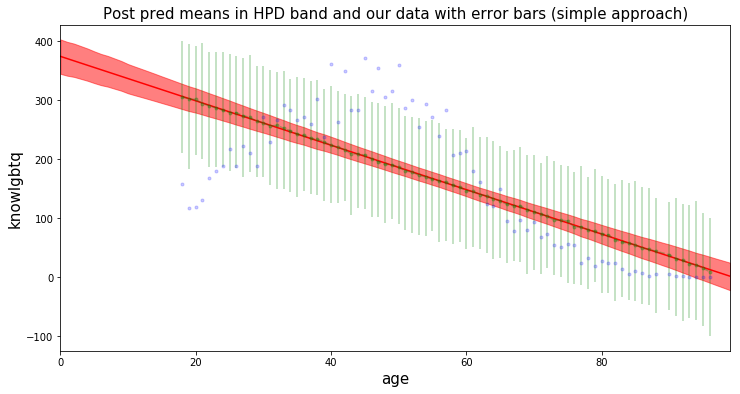

In [32]:
plt.figure(figsize=(12,6))
postpred_means_simple = postpred_simple['knowlgbtq'].mean(axis=0)
postpred_hpd_simple = pm.hpd(postpred_simple['knowlgbtq'])
plt.plot(survey.age, survey.knowlgbtq, '.', c='b', alpha=0.2)
plt.plot(agegrid, mu_mean_simple, 'r')
plt.fill_between(agegrid, mu_hpd_simple[:,0], mu_hpd_simple[:,1], color='r', alpha=0.5)
yerr_simple=[postpred_means_simple - postpred_hpd_simple[:,0], postpred_hpd_simple[:,1] - postpred_means_simple] 
plt.errorbar(survey.age, postpred_means_simple, yerr=yerr_simple, fmt='--.', c='g', alpha=0.3, capthick=3)
plt.xlabel('age', fontsize=15)
plt.ylabel('knowlgbtq', fontsize=15)
plt.xlim([agegrid[0], agegrid[-1]]);
plt.title('Post pred means in HPD band and our data with error bars (simple approach)', fontsize=15)



In [33]:
n_ppredsamps=1000
meanage = survey.age.mean()
ppc_samples_simple=np.zeros((len(agegrid), n_ppredsamps))

for j in range(n_ppredsamps):
    k=np.random.randint(2*len(trace))
    musamps_simple = trace_simple['intercept'][k] + trace_simple['slope1'][k] * (agegrid - survey.age.mean())
    sigmasamp_simple = trace_simple['sigma'][k]
    ppc_samples_simple[:,j] = np.random.normal(musamps_simple, sigmasamp_simple)


In [34]:
ppc_samples_std_simple=[]  
i=0
while i <100:   
    std = 2*np.std((ppc_samples_simple)[i])
    ppc_samples_std_simple.append(std)
    i=i+1

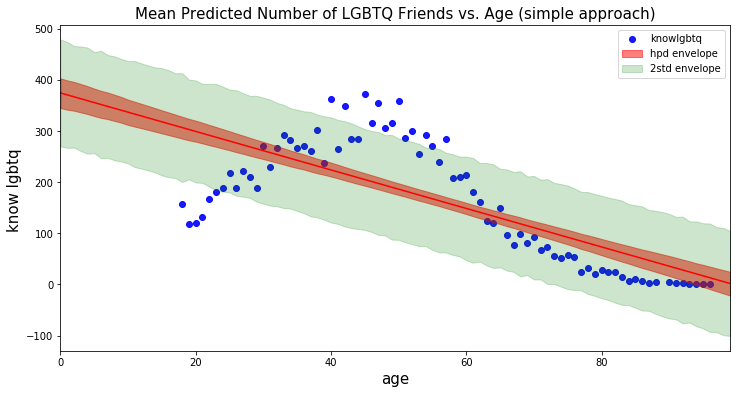

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(survey.age, survey.knowlgbtq, c='b', alpha=0.9)
plt.plot(agegrid, mu_mean_simple, 'r')
plt.fill_between(agegrid, mu_hpd_simple[:,0], mu_hpd_simple[:,1], color='r', alpha=0.5, label='hpd envelope')
plt.fill_between(agegrid, mu_mean_simple-ppc_samples_std_simple, mu_mean_simple+ppc_samples_std_simple, color='green', alpha=0.2, label='2std envelope')

plt.title('Mean Predicted Number of LGBTQ Friends vs. Age (simple approach)', fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('know lgbtq ', fontsize=15)
plt.xlim([agegrid[0], agegrid[-1]])
plt.legend()


2.2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

(**Hint: For an example of GP Regression from class see [this GP Recap](http://am207.info/wiki/gpsalmon.html)**)

In [36]:
#this code attributed to fonnesbeck and Patrick's office hours
with pm.Model() as gp_model:

    # Lengthscale
    rho = pm.HalfCauchy('rho', beta=10)
    s2_f = pm.HalfCauchy('s2_f', beta=3)
    s2_n = pm.HalfCauchy('s2_n', beta=2)
    
    f_row = (s2_f**2) * pm.gp.cov.ExpQuad(1, rho) 
    mgp=pm.gp.Marginal(cov_func=f_row)
    
    
    y_obs=mgp.marginal_likelihood('knowlgbtq', X=survey.age.values.reshape(-1,1), 
                           y=survey.knowlgbtq.values, noise=s2_n, is_observed=True)
    

/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


In [39]:
with gp_model:
    
    stepper=pm.Metropolis()
    #find MAP
    
   
    lgbtq_trace = pm.sample(20000,  cores=-1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Sequential sampling (2 chains in 1 job)
NUTS: [s2_n, s2_f, rho]
100%|██████████| 20500/20500 [04:52<00:00, 29.90it/s] 
/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The ac

Text(0.5,1,'trace plots')

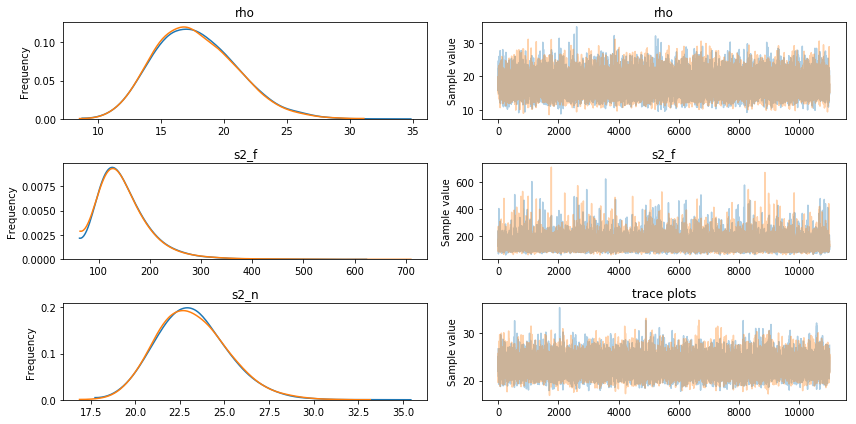

In [43]:
lgbtq_trace = lgbtq_trace[4000:]
pm.traceplot(lgbtq_trace, varnames=['rho', 's2_f', 's2_n'])
plt.title('trace plots')

Text(0.5,1,'autocorrelation plots')

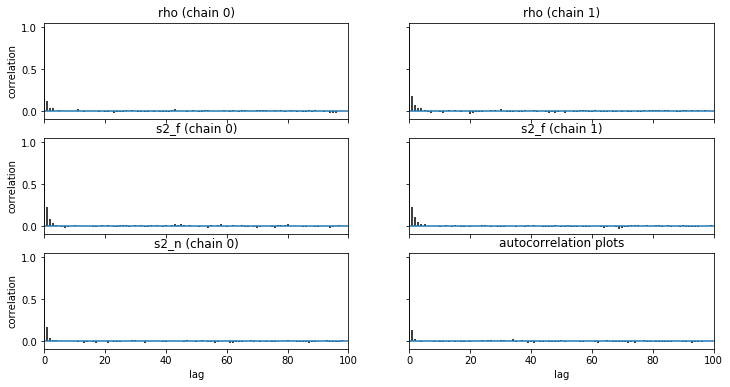

In [46]:
pm.autocorrplot(lgbtq_trace, varnames=['rho', 's2_f','s2_n'])
plt.title('autocorrelation plots')

In [147]:
X_pred = np.linspace(0, 100, 100).reshape(-1, 1)
with gp_model:
    lgbtq_predict = mgp.conditional("lgbtq_predict", X_pred)
    lgbtq_samples = pm.sample_ppc(lgbtq_trace, vars=[lgbtq_predict], samples=20)

/Users/adavydova/Desktop/anaconda3/lib/python3.7/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
100%|██████████| 20/20 [00:00<00:00, 24.73it/s]


In [175]:
means=[]
sds=[]
samps=pd.DataFrame(lgbtq_samples['lgbtq_predict'].T)
i=0
while i < 100:
    sd=2*np.std(np.array(samps.iloc[[i]]))
    sds.append(sd)
    mean=np.mean(np.array(samps.iloc[[i]]))
    means.append(mean)
    i=i+1
    

Text(0,0.5,'know LGBTQ')

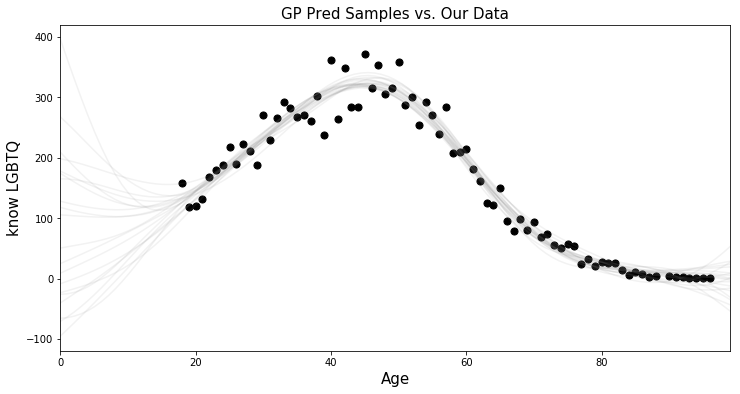

In [154]:
plt.figure(figsize=(12,6))
plt.scatter(survey['age'], survey['knowlgbtq'], c='k', s=50)
plt.xlim([agegrid[0], agegrid[-1]])
for x in lgbtq_samples['lgbtq_predict']:
    plt.plot(X_pred, x, "gray", alpha=0.1)
    
plt.title('GP Pred Samples vs. Our Data', fontsize=15)  
plt.xlabel('Age', fontsize=15)
plt.ylabel('know LGBTQ', fontsize=15)

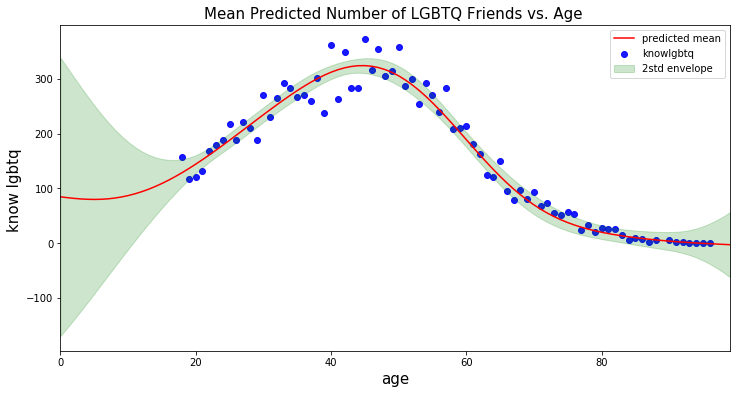

In [194]:
plt.figure(figsize=(12,6))
plt.scatter(survey.age, survey.knowlgbtq, c='b', alpha=0.9)
plt.plot(agegrid, means, 'r', label='predicted mean')
plt.fill_between(agegrid, means_neg, means_pos, color='green', alpha=0.2, label='2std envelope')

plt.title('Mean Predicted Number of LGBTQ Friends vs. Age ', fontsize=15)
plt.xlabel('age', fontsize=15)
plt.ylabel('know lgbtq ', fontsize=15)
plt.xlim([agegrid[0], agegrid[-1]])
plt.legend()

**2.3.** How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?


When we look at the two models (both simple and polynomial Bayesian and our GP model above), we notice that the GP model outperforms the Bayesian model when it comes to both fitting our existing data and making predictions in the age range where we dont' have any data.  Note that our simple Bayesian regression model missed the curve entirely, plotting a straight line that fit our curving data very poorly and forecasted unreastic values (i.e. 300-500 babies at age 0 have at least one LGBTQ acquientance).  While our polynomial Bayesian regression did a better job fitting the curvature of our data than the simple regression model, it too made highly unrealistic forecasts for the data points where we had no data. In this case, Bayesian polynomial regression forecasts negative 500-800 babies who are friends with at least one LGBTQ person.  Although the polynomial model did better for folks at age 100 predicting what looks like a realistic,low, positive value.  Simple Bayesian regression, on the other hand, included negative values in its 95% CI.  When we look at the GP model, above, we note that the it predicts more reasonable mean values at the tails where we have no data (i.e. positive, small values, consistent with the curvature of our data). In addition, we note a much more robust trace and autocorrelation plots for the GP model than either of the Bayesian regression models (which might explain why we get more reasonable estimates with GP). Finally, while with Bayesian regression, we did not see fanning out of the 95% CI at the tails (it remained fairly consistent throughout for both simple and polynomial models), we see a different picture with GP model above. The 95% CI fans out sharply at the tails where we have no values, indicating high uncertainty, and narrows sharply where we have observations, indicating higher confidence in its forecasts. In other words, we see more variance in estimates at low and high age for GP model than for Bayesian model (surprising as I would expect to see high variance at the tails for both).

Finally, looking at our models whe note that there appears to be a positive relationship between age and number of LGBTQ acquientances in the 0-50 age group. However, this trend turns negative in the 50-100 age group.  One could infer that young adults through middle aged adults tend to know/meet more LGBTQ folks than adults 60years of age and older. If we only built a simple linear Bayesian regression, we would have made the wrong/oversimplified conclusion that the number of LGBTQ friends goes down with age.  However, it appears that we have two important/opposing trends here. Of course, the model is not adjusted for population size in each group and in the future, I would have preferred to model per capital LGBTQ friends for each age group.

**Gratuitous Titular References**:  

Massachusett's own [Joiner Lucas](https://en.wikipedia.org/wiki/Joyner_Lucas) blew up in November 2017 with the release of his single ["I'm Not Racist"](https://www.youtube.com/watch?v=43gm3CJePn0) on Youtube.  The video quickly went viral. The title comes from the song's lyrics (and references that degrees of separation that can be involved in individual experience with members of any under-represented group).

Given the oncoming cold spell [Winter Blues](https://www.youtube.com/watch?v=I7_ofdl9Wfs) another popular track may be relevant.

<div class="answer-separator">
------------------------
</div>

## Question 3 - AM207 HWs Out (A OK I MIC DROP)!

**coding required**

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone built for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to 3.1-3.5:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.

II. Relevant (possibly) to more complex models:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":
<img src="restuarant_model.pdf">

***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*


When the value in "count" is low, the "mean" value can be very skewed.

3.1. Following the [SAT prep school example discussed in lab](https://am207.info/wiki/gelmanschoolstheory.html) (and influenced your answers for HW 10 Question #1), set up a Bayesian model (that is, write functions encapsulating the pymc3 code) for a reviewer $j$'s opinion of restaurant $k$'s food and service (considering the food and service separately).  You should have a model for each restaurant and each aspect being reviewed (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** What quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?

3.2. Just to test your that modeling makes sense choose 1 restaurant and run your model from 3.1 on the food and service aspects for that restaurant.  Create 10K samples  each for the food and service model for your chosen restuarant and visualize your samples via a traceplot for each aspect of the restaurant reviews.

3.3. Use your model from 3.1 to produce estimates for $\theta_{jk}$'s for multiple restaurants. Pick a few (try for 5 but if computer power is a problem, choose 2) restaurants and for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant). 

For the chosen restaurants, for each aspect ("food" and "service"), generate shrinkage plots and probability shrinkage plots as follows:

**Shrinkage plot for a restaurant, topic**:

> The aim for this plot is to see the shrinkage from sample means (error bars generated from standard error) to $\theta_{jk}$'s (error bars generated from theta variance).  
>
> The sample means of reviews are plotted at $y=0$ and the posterior means ($\theta_{ik}$) are plotted at $y=1$. For each review connect the sample mean to the posterior mean with a line.  Show error bars on the sample mean points using standard error and on the ($\theta_{jk}$) points using variance.

**Probability Shrinkage plot for a restaurant, topic**:

> The aim for this plot is to see the shrinkage from the classification probabilities from the sample means of reviews to the classification probabilities of $\theta_{jk}$'s.  The classification probabilities are calculated from the gaussian at the given mean and variance. The sample means and standard error are fed into the gaussian to generate one set of classification probabilities.  The $\theta_{jk}$ estimates and variances are fed into the gaussian to generate the other set of variances.
>
> The y values are the classification probability (calculated as 1-cdf) using the normal distribution at a given mean and variance.
>
> The sample means of reviews are plotted with $y$'s obtained by using the sample means as the means in the normal above, with line segments (error bars) representing the standard error. 
>
> The posterior means ($\theta_{jk}$) are plotted with $y$'s obtained using the posterior means (thetas) in the gaussian above, and variances on the thetas with line segments (error bars) representing the variances on the $\theta_{jk}$'s.
>
>We've provided you some code to generate a shrinkage plot and a probability shrinkage plot is included in this notebook, but feel free to implement your own. The code should also help elucidate the text above.

Example of a shrinkage plot:
<img src="https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjop9gx9xfww9%2Fshrinkage.png" width="400" height="400"/>

Example of a probability shrinkage plot:
<img src="https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlo4e4ari3r4wd%2Fj9vjyzv62x149%2Fjop9fsbbu9bs%2Fshrinkage_prob.png" width="400" height="400"/>


3.4. Based on your shrinkage plots and probability shrinkage plots in 3.3 discuss the statistical benefits of modeling each reviewer's opinion using your hierarchical model rather than approximating the reviewer opinion with the value in "mean".

3.5. Aggregate, in a simple but reasonable way, the reviewer's opinions given a pair of overall scores for each restaurant -- one for food and one for service. Rank the restaurants by food score and then by service score. 

(**Hint:**  Think what an average score for each aspect would do here?)

3.6. Discuss the statistical weakness of ranking by these scores.

(**Hint:** What is statistically problematic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)  


In [154]:
import itertools

# Use 1-cdf at 0.5 to model the probability of having positive sentiment
# it basically tells you the area under the gaussian after 0.5 (we'll assume 
# positive sentiment based on the usual probability > 0.5 criterion)

prob = lambda mu, vari: .5 * (1 - erf((0.5- mu) / np.sqrt(2 * vari)))

# fix a restaurant and an aspect (food or service)
# "means" is the array of values in the "mean" column for the restaurant and the aspect 
#         in the dataset
# "thetas" is the array of values representing your estimate of the opinions of reviewers 
#          regarding this aspect of this particular restaurant
# "theta_vars" is the array of values of the varaiances of the thetas
# "counts" is the array of values in the "count" column for the restaurant and the aspect 
#.         in the dataset
# FEEL FREE TO RE-IMPLEMENT THESE

def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts, ax):
    """
    a plot that shows how review means (plotted at y=0) shrink to
    review $theta$s, plotted at y=1
    """
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)   
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me, te, c in data: # mean, theta, mean errir, thetax error, count
            color=next(palette)
            # add some jitter to y values to separate them
            noise=0.04*np.random.randn()
            noise2=0.04*np.random.randn()
            if me==0:
                me = 4
            # plot shrinkage line from mean, 0 to
            # theta, 1. Also plot error bars
            ax.plot([m,t],[noise,1+noise2],'o-', color=color, lw=1)
            ax.errorbar([m,t],[noise,1+noise2], xerr=[np.sqrt(me), np.sqrt(te)], color=color,  lw=1)
        ax.set_yticks([])
        ax.set_xlim([0,1])
        sns.despine(offset=-2, trim=True, left=True)
    return plt.gca()

def prob_shrinkage_plot(means, thetas, mean_vars, theta_vars, counts, ax):
    """
    a plot that shows how review means (plotted at y=prob(mean)) shrink to
    review $theta$s, plotted at y=prob(theta)
    """
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)
    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me, te, c in data: # mean, theta, mean errir, theta error, count
            color = next(palette)
            # add some jitter to y values to separate them
            noise = 0.001 * np.random.randn()
            noise2 = 0.001 * np.random.randn()
            if me == 0: #make mean error super large if estimated as 0 due to count=1
                me = 4
            p = prob(m, me)
            peb = prob(t, te)
            # plot shrinkage line from mean, prob-based_on-mean to
            # theta, prob-based_on-theta. Also plot error bars
            ax.plot([m, t],[p, peb],'o-', color=color, lw=1)
            ax.errorbar([m, t],[p + noise, peb + noise2], xerr=[np.sqrt(me), np.sqrt(te)], color=color, lw=1)
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1.05])
    return ax

**Gratuitous Titular Reference**:  

Thank you for putting up with us -- No more HWs!  No more gratuitous titular references!

We'll leave with a [Steve Aoki](http://www.steveaoki.com/) and [K-Pop](https://en.wikipedia.org/wiki/K-pop) style [Mic Drop](https://www.youtube.com/watch?v=kTlv5_Bs8aw).  Take it away [BTS](https://en.wikipedia.org/wiki/BTS_(band)).  Don't [Burn the Stage](https://www.youtube.com/watch?v=uwgDg8YnU8U) on the way out!

[AM207 HW Crew out!](https://www.youtube.com/watch?v=Tg0hLMop200)

<div class="answer-separator">
------------------------
</div>